In [1]:
import pandas as pd

import numpy as np



from sklearn.datasets import california_housing, load_iris, load_wine, load_breast_cancer

from sklearn.metrics import accuracy_score, classification_report, r2_score, mean_squared_error

from sklearn.model_selection import train_test_split

from sklearn.tree import plot_tree, DecisionTreeClassifier

from sklearn.tree import DecisionTreeRegressor

from sklearn.datasets.base import Bunch



import matplotlib.pyplot as plt
import seaborn as sns


import sys


# Decision Trees

1) They can be used for both classification and regression.

2) They operate on tree based structure for features and predictions

In [2]:
class Get_Dataset:
    
    def __init__(self, task_type = "Classification", dataset = "Iris", prediction_type = None):
        
        
        self.dataset_name = dataset
        self.task_type = task_type
        self.prediction_type = prediction_type
        self.dataset = None
        
        self._fetch_data()
        
    
    def load_titanic(self):
        
        df = pd.read_csv("D:/Amith_Learning/Interviewing-IFYOUCAN/DS_AI_Material/titanic/titanic_train.csv")
        
        df["Age"].fillna(df["Age"].median(skipna = True), inplace = True)
        
        df["Embarked"].fillna( df["Embarked"].mode().values[0], inplace = True )
        
        df.drop(labels = ["Name", "Ticket", "PassengerId", "Cabin"], axis = 1, inplace = True)
        
                
        genders = {"male": 0, "female": 1}; ports = {"S": 0, "C": 1, "Q": 2}
        
        df["Sex"] = df["Sex"].map(genders)
        df["Embarked"] = df["Embarked"].map(ports)
        
        
        return Bunch(data = df.drop("Survived", axis = 1 ).values,
             target = df["Survived"].values,
             feature_names = df.drop("Survived", axis = 1 ).columns,
             target_names = ["Not Survived", "Survived"]
             )
     
    
    
    def load_wine_reg(self, typ = "Full"):
        
        if typ == "Full":
            wine = load_wine()
            
            return Bunch(data = wine.data, 
                        target = wine.target)
            
            
            
    def load_winee(self, typ = "Small"):
        
        
        if typ == "Small":
            wine = load_wine()
            
            df = pd.DataFrame(data = wine.data, columns = wine.feature_names)
            df["target"] = wine.target
            
            result_df = df.where(df.target <= 2)
            
            
            
            return Bunch(data = result_df.drop("target", axis = 1 ).values,
             target = df["target"].values,
             feature_names = df.drop("target", axis = 1 ).columns,
             target_names = ["0", "1", "2"]
             )
            
            
            
            
            
    def _fetch_data(self):
        
        
        available_datasets = {"Iris" : load_iris(), "Cancer": load_breast_cancer(),
                             "Titanic": self.load_titanic(), "wine_class": self.load_winee(typ = "Small"),
                             "wine_reg": self.load_wine_reg(typ = "Full"),
                             "California_housing": california_housing.fetch_california_housing() }
        
 
        
        if self.task_type == "Classification":
            
            self.dataset = available_datasets[self.dataset_name]
            
            if self.prediction_type == "binary":
                self.features = self.dataset.data[:100]
                self.targets = self.dataset.target[:100]
            
            else:
                self.features = self.dataset.data
                self.targets = self.dataset.target
                
                
            self.feature_names = self.dataset.feature_names
            self.target_names = self.dataset.target_names
            
        elif self.task_type == "Regression":
            
            self.dataset = available_datasets[self.dataset_name]
            self.features = self.dataset.data
            self.targets = self.dataset.target
                       

In [3]:
# dataset = Get_Dataset(task_type = "Classification", dataset = "Titanic", prediction_type = "multi_class")

In [4]:
class Impurity:
    
    def __init__(self, dist, typ = "Gini"):
        
        self.type = typ
        self.class_dist = dist
        
        
        
        
        if self.type == "Gini":
            self.gini = self._Gini()
            
        elif self.type == "MSE":
            self.mse = self._MSE()
            
        elif self.type == "Entropy":
            self.entropy = self._entropy()
        
        
    def _Gini(self):
        
        # 1 - probability of yes ('1', versi color) squared - probability of No('0', setosa) squared
        
        # If all counts are zero, then this split is 100% impure, so returning 1
        
        if len(self.class_dist.keys()) > 2:
            
        
            if self.class_dist[0] == 0 and self.class_dist[1] == 0 and self.class_dist[2] == 0:
                return 1

            total = self.class_dist[0] + self.class_dist[1] + self.class_dist[2]

            return (1 - (self.class_dist[0] / total)**2 - (
                self.class_dist[1] / total)**2  - (self.class_dist[2] / total)**2 )
        
        
        elif len(self.class_dist.keys()) == 2:
            
            if self.class_dist[0] == 0 and self.class_dist[1] == 0:
                return 1

            total = self.class_dist[0] + self.class_dist[1] 

            return (1 - (self.class_dist[0] / total)**2 - (
                self.class_dist[1] / total)**2  )
        
            
    def _Entropy(self):
        
        pass
    
    
    def _MSE(self):
        
        
        if len(self.class_dist) > 0:
        
        
            mean_dist = np.mean( self.class_dist )
            
            se = [ (val - mean_dist) ** 2 for val in self.class_dist ]
            
            return np.mean( se )

        return 100000.00
        
class Node:
    
    def __init__(self, feature='def', feature_threshold = 'def',
                 impurity = 0,lbd = 0,rbd=0, samples = 0, label_class = 'Default', leaf = False,
                 depth = 0, values = []
                 ):
        
        self.feature = feature
        self.feature_threshold = feature_threshold
        self.impurity = impurity
        
        self.left_branch_dist = lbd
        self.right_branch_dist = rbd
        
        
        self.left_branch = None
        self.right_branch = None
        
        self.samples = samples
        self.values = values
        self.label_class = label_class
        
        self.depth = depth
    
        self.leaf = leaf
           
            
            
class Regression_Metrics:
    
    def __init__(self):
        pass
    
    def R2(self):
        pass
    
    
    def MAE(self):
        pass
    
    
    def MSE(self):
        pass
    
    def RMSE(self):
        pass
    
class Classification_Metrics:
    
    def __init__(self):
        pass
    
    
    def Accuracy(self):
        pass
    
    def precision(self):
        pass
    
    def Recall(self):
        pass
    
    def F1_Score(self):
        pass
    

In [5]:
# df = pd.DataFrame(data = dataset.features, columns = dataset.feature_names)
# df["target"] = dataset.targets


# X_train, X_test, y_train, y_test = train_test_split(df.drop("target",axis = 1).values,
#                                                     df["target"].values,
#                                                     test_size = 0.45, shuffle = True, random_state = 16)



# df_train = pd.DataFrame(data = X_train, columns = dataset.feature_names)
# df_train["target"] = y_train


# df_test = pd.DataFrame(data = X_test, columns = dataset.feature_names)
# df_test["target"] = y_test

# chosen_depth = 5
# chosen_splitter = "best"
# chosen_max_features_split = 3
# chosen_min_samples = 5


# DCTC V1

In [6]:
# class DTClassifier_V1:
    
#     def __init__(self, feature_names, max_depth = 2, min_samples_split = 5):
        
#         self.feature_names = feature_names
        
#         self.max_depth = max_depth
        
#         self.min_samples_split = min_samples_split
        
#         self.Root = None
        
        
#     def _add_default_labels(self, branch_uni, branch_dist):
        
        
        
#         classification_type_label_mapper = { "binary_0": ([0,1] , [0,0]) ,
                                            
#                                             "multi_class_0" : ([i for i in range(self.min_unique_label,
#                                                                                  self.num_unique_labels )],
#                                                                [0 for _ in range(self.num_unique_labels) ]) 
#                                             }
        
        
#         if self.num_unique_labels == 2:
#              classification_type = "binary"
        
#         elif self.num_unique_labels > 2:
#             classification_type = "multi_class"
        
        
        
#         if len(branch_uni) == 0:
#             return classification_type_label_mapper[classification_type + "_" + str(0)]
        
        
#         elif len(branch_uni) < self.num_unique_labels:
            
            
#             num_uni = [ ]; num_dist = [ ]
            
#             # ( list( (branch_uni[0], 1 - branch_uni[0]) ), list((branch_dist[0],0 ) ) )
            
#             for i in range(self.min_unique_label, self.num_unique_labels):
                
#                 if i in branch_uni:
#                     num_uni.append(i)
#                     num_dist.append(  branch_dist[0] )
                
#                 else:
#                     num_uni.append(i)
#                     num_dist.append(0)
                    
            
#             return (num_uni, num_dist)
            
        
#         else:
#             return (branch_uni, branch_dist)
        
        
#     def _identify_split(self, X, df, Root = True):
        
        
#         Features_Impurities = {}
        
        
#         # Now go through each feature amongst all features
#         for feature_index in range(X.shape[1]):
            
            
#             all_rows_feature = X[: , feature_index]
            
#             # identify if all (m) of feature values are categorical or continuous variable
            
#             # If it's a continuous variable, take average of adjacent pairs of feature values
#             # for each value of this feature, do a binary evaluation, i.e., greater than this value and less than this
#             # value compare the corresponding label values
            
#             # after comparing (m) label values against binary evaluation of this feature values, calculate impurity of:
#                 # left branch and right branch of this feature value ( the binary comparisions)
#                 # Finally, calculate impurity w.r.t this feature on the whole
                
#             # if categorical, go through each category value of this feature, do a binary evaluation, i.e., < / > this value
#             # compare the corresponding label values
            
#             if all_rows_feature.dtype == "float32" or all_rows_feature.dtype == "float64":
                
#                 # Sort values in increasing order
#                 all_rows_feature.sort()
                
#                 # Calculate avergae of adjacent values and increase the data count size
#                 new_data_feature = []
                
#                 for i in range(len(all_rows_feature)):
                    
                    
#                     if i == 0:
#                         new_data_feature.append(all_rows_feature[i])
                        
#                     else:
#                         new_data_feature.append( (all_rows_feature[i] + all_rows_feature[i-1]) / 2 )
#                         new_data_feature.append(all_rows_feature[i])
                
              
                
                
#                 value_impurities_list = []
               
            
#                 #for each value of these newly calculated features ...
#                 for cv in new_data_feature:
                    
#                      # do a binary evaluation, i.e., greater than this value and less than this value
                        
#                     left_branch_df = df.loc[df[self.feature_names[feature_index]] <= cv,
#                                               [self.feature_names[0], self.feature_names[1],
#                                                self.feature_names[2], self.feature_names[3],'target']]
                    
#                     right_branch_df = df.loc[df[self.feature_names[feature_index]] > cv,
#                                                [self.feature_names[0], self.feature_names[1],
#                                                self.feature_names[2], self.feature_names[3],'target']]
                    

#                     # compare the corresponding label distribution and values in each branch
#                     left_branch_uni, left_branch_dist = np.unique(left_branch_df["target"].values,
#                                                                   return_counts = True)
                    
#                     right_branch_uni, right_branch_dist = np.unique(right_branch_df["target"].values, 
#                                                                     return_counts = True)
                    
                    
                    
#                     # This returns two lists
#                     left_branch_uni, left_branch_dist = self._add_default_labels(branch_uni = left_branch_uni,
#                                                                                branch_dist = left_branch_dist)
                    
#                     right_branch_uni, right_branch_dist = self._add_default_labels(branch_uni = right_branch_uni,
#                                                                                  branch_dist = right_branch_dist)
                        
#                     # Each of the unique labels and their counts for each ( could be 0 or more)
#                     # left -> 0:0, 1:10, right 0:5, 1:28
#                     left_branch_whole = dict( zip(left_branch_uni, left_branch_dist) )
#                     right_branch_whole = dict( zip(right_branch_uni, right_branch_dist))
                                        
                    
                    
                    
                    
#                     # Calculate the impurities w.r.t to each of the branches
#                     # left_impurity: 0.99, right_impurity: 0.3115
#                     left_impurity = Impurity(dist = left_branch_whole, typ = "Gini").gini
#                     right_impurity = Impurity( dist = right_branch_whole, typ = "Gini").gini
                    
                    
#                     # left_total: 10, right_total: 33
#                     left_total_dist = left_branch_whole[0] + left_branch_whole[1]
#                     right_total_dist = right_branch_whole[0] + right_branch_whole[1]
                    
                    
#                     if self.num_unique_labels > 2:
#                         left_total_dist += left_branch_whole[2]
#                         right_total_dist += right_branch_whole[2]
                    
                    
                    
#                     # total_target: 43
#                     total_target_dist = left_total_dist+ right_total_dist
                    
#                     # cv_impurity: (10/43) * 0.99 + (33/43) * 0.31 => 23.25
#                     current_value_impurity = ( left_total_dist / total_target_dist ) * left_impurity \
#                     + ( right_total_dist / total_target_dist) * right_impurity
                    
                    
# #                     print("Value: {}, Impurity: {} , left_branch_distribution: {}, right_branch: {}".format(
# #                     cv, current_value_impurity, left_branch_whole, right_branch_whole))
                    
                    
#                     value_impurities_list.append((cv, current_value_impurity, left_branch_df, right_branch_df))
                    
                
                    
#                 value_impurities_df = pd.DataFrame(data = value_impurities_list,
#                                                   columns = ["cvs", 'Impurity', "left_branch_df", "right_branch_df"])
                
#                 value_impurities_list = [ ]
                
                
                
#                 # Calculate minimum impurity of all individual features
#                 min_impurity_val = min(value_impurities_df["Impurity"])    
                
                
#                 # For this feature 'X' , the value which yields minimum impurity
#                 Features_Impurities[self.feature_names[feature_index]] = value_impurities_df.loc\
#                 [value_impurities_df["Impurity"] == min_impurity_val, 
#                  ["cvs", 'Impurity', "left_branch_df", "right_branch_df"]].values
                
#                 # Choosing only one row of all minimum impurities, if there are multiple rows satisfying the condition
#                 if len(Features_Impurities[self.feature_names[feature_index]]) > 1:
#                     Features_Impurities[self.feature_names[feature_index]] = \
#                     Features_Impurities[self.feature_names[feature_index]][ np.random.randint(low = 0,
#                                                 high = len(Features_Impurities[self.feature_names[feature_index]]),
#                                         size = (1,)) ]
                
                
   
            
#             elif all_rows_feature.dtype == "int32" or all_rows_feature.dtype == "int64":
#                 pass
        
    
#         user_ids = []
#         frames = []

#         for user_id, d in Features_Impurities.items():
#             user_ids.append(user_id)
#             frames.append(pd.DataFrame(d, columns =["cv", "Impurity", "lbdf", "rbdf"]))

#         Features_Imp_df = pd.concat(frames, keys=user_ids)
        
        
#         # Calculating min impurity at feature level
#         min_cv = min(Features_Imp_df["Impurity"].values)

#         result = Features_Imp_df.loc[Features_Imp_df["Impurity"] == min_cv , ["cv", "Impurity", "lbdf", "rbdf"]]
        
        
#         result = result.sample(n=1, replace = False)
        
#         result_index = result.index[0][0]
        
#         finalresult = result.values[0]
        
        
#         return (result_index, finalresult[0],
#                 finalresult[1],
#                 finalresult[2], finalresult[3]  )
        
    
#     def fit(self, X,y):
        
#         """
#         a. Because it's a classifier we already know what the output variable is, it's a fixed label.
#         ( for now assuming it's already binary encoded).
        
#         b. now go through each feature, identify if that feature is a fixed integer number or a continuous variable.
        
#         """
        
        
#         self.df = pd.DataFrame(data = X, columns = self.feature_names)
#         self.df["target"] = y
        
        
#         # Identify if it's a binary-class classification or multi-class classification
#              # TBD 4/25/20
            
        
        
#         unique_labels = np.unique(y)
        
#         self.min_unique_label, self.num_unique_labels = min(unique_labels), len(unique_labels)
            
                    
#         feature,feature_threshold,impurity\
#         ,left_branch, right_branch = self._identify_split(X, df = self.df, Root = True)

#         self.Root = Node(feature = feature, feature_threshold = feature_threshold,
#                         impurity = impurity, lbd = left_branch, rbd = right_branch, depth = 0,
                        
#                         samples = len(X),
                        
#                         values = {0:32,1:25,2:40},
                        
#                         label_class = 'Default')
        
        
        
        
#         # We have found a perfectly seperable data set, which seperates two classes with no impurities
#         # splitting this data any futher will not lead to better impurities, as there's no such thing as
#         # negative impurities
#         if self.Root.impurity == 0:
            
#             self.Root.left_branch = Node(feature = None, feature_threshold = None, impurity = 0,
#                  lbd = None, rbd = None, 
                 
#                  samples = np.sum(self.Root.left_branch_dist.values),
                
#                  label_class = self.Root.left_branch_dist, leaf = True, depth = 1 )
            
            
#             self.Root.right_branch = Node(feature = None, feature_threshold = None, impurity = 0,
#                  lbd = None, rbd = None,
                 
#                  samples = np.sum(self.Root.right_branch_dist.values),
                 
#                  label_class = self.Root.right_branch_dist, leaf = True, depth = 1 )
            
            
#             return "Fitted the data set"
        
        
        
        
#         # The root node does not have perfect impurity, so we will have to build the tree further to classify properly
#         else:
            
#             actualRoot = self.Root;  stack = []; stack.append(actualRoot)
            
            
#             # Iterate until stack is empty of all nodes, and until you found all left and right branches
#             # to current root node
#             while len(stack) > 0:
                
#                 # Popping the top of stack and calling it root node
#                 currentRoot = stack.pop()
                
# #                 print("Current root: {}, it's left :{}, it's right: {}".format(currentRoot.feature,
# #                                                                               currentRoot.left_branch,
# #                                                                               currentRoot.right_branch)  )
   
#                 # Checking if we reached maximum depth
#                 if currentRoot.depth == self.max_depth:
#                     currentRoot.feature = None; currentRoot.feature_threshold = None
#                     currentRoot.leaf = True; currentRoot.left_branch_dist = None
#                     currentRoot.right_branch_dist = None; 
#                     currentRoot.left_branch = None; currentRoot.right_branch = None
#                     continue
        
                
#                 if (currentRoot.left_branch == None) & (not currentRoot.leaf):
                    
                    
#                     if currentRoot.left_branch_dist.shape[0] > self.min_samples_split:
                        
# #                         print("This root: {} with values: {} has greater split on left, so setting to normal checks".format(currentRoot.feature, currentRoot.feature_threshold))
                        
                        
#                         lbu, lbd = np.unique(currentRoot.left_branch_dist["target"].values,
#                                                                  return_counts = True)

#                         left_branch_uni, left_branch_dist = self._add_default_labels(branch_uni = lbu,
#                                                                                    branch_dist = lbd)

#                         # Calculate the impurity if we not had to split the current data with extra features
#                         pure_left_imp = Impurity(dist = dict(zip(left_branch_uni, left_branch_dist)),
#                                                 typ = "Gini" ).gini


#                         calc_feature,calc_feature_threshold,calc_left_impurity\
#                         ,calc_left_branch_dist, calc_right_branch_dist = self._identify_split\
#                         (X = currentRoot.left_branch_dist.drop("target",axis = 1).values,
#                          df = currentRoot.left_branch_dist)

#                         # the impurity is lesser when we are at current level
#                         if pure_left_imp <= calc_left_impurity:



#                             currentRoot.left_branch = Node(feature = None, feature_threshold=None,

#                                                            impurity = pure_left_imp, lbd= None, rbd=None, 

#                                                            values = dict( zip( left_branch_uni, left_branch_dist )),

#                                                            samples = currentRoot.left_branch_dist.shape[0],

#                                                            label_class = "Calculate ! You !", leaf = True,

#                                                           depth = currentRoot.depth + 1)


# #                             print("Found a leaf to left of :{}, new feature to left: {}".format(currentRoot.feature, currentRoot.left_branch.feature
# #                                                                                 ))

#                             stack.append(currentRoot)


#                         # the impurity would be lesser if we split the current data 
#                         # by going down to one more level
#                         elif pure_left_imp > calc_left_impurity:


#                             currentRoot.left_branch = Node(feature = calc_feature, feature_threshold = calc_feature_threshold,
#                                 impurity = calc_left_impurity, lbd = calc_left_branch_dist, rbd = calc_right_branch_dist,

#                                 values = dict( zip( left_branch_uni, left_branch_dist )),
#                                 samples = currentRoot.left_branch_dist.shape[0] ,                     
#                                 label_class = "Calculate", leaf = False,
#                                 depth = currentRoot.depth + 1)


# #                             print("DId not find a leaf to left of :{}, new feature to left: {}".format(currentRoot.feature,
# #                                                                         currentRoot.left_branch.feature))


#                             stack.append(currentRoot)
#                             stack.append(currentRoot.left_branch)
            
            
#                     elif currentRoot.left_branch_dist.shape[0] == self.min_samples_split:
                        
# #                         print("This root: {} with values: {} has eqaul split on left, so setting to leaf".format(currentRoot.feature, currentRoot.feature_threshold))
                        
                        
#                         lbu, lbd = np.unique(currentRoot.left_branch_dist["target"].values,
#                                                                  return_counts = True)

#                         left_branch_uni, left_branch_dist = self._add_default_labels(branch_uni = lbu,
#                                                                                    branch_dist = lbd)
                        
                        
#                         currentRoot.left_branch = Node(feature = None, feature_threshold= None,
#                                                       lbd = None, rbd = None,
#                                                     samples = currentRoot.left_branch_dist.shape[0],
#                                                     values = dict(zip(left_branch_uni, left_branch_dist)),
#                                                     label_class = "Default",
#                                                     leaf = True)
                        
#                         stack.append(currentRoot)
                    
#                     else:
# #                         print("This root: {} with values: {} has lesser split on left, so setting to false".format(currentRoot.feature, currentRoot.feature_threshold))
                        
#                         currentRoot.left_branch = False
#                         stack.append(currentRoot)

                            
                    
                 

#                 elif (currentRoot.right_branch == None) & (not currentRoot.leaf):
                    
                   
#                     if currentRoot.right_branch_dist.shape[0] > self.min_samples_split: 
                        
# #                         print("This root: {} with values: {} has greater split on right, so setting to normal checks".format(currentRoot.feature, currentRoot.feature_threshold))
                        
                        
#                         rbu, rbd = np.unique(currentRoot.right_branch_dist["target"].values,
#                                                                  return_counts = True)

#                         rbu, rbd = self._add_default_labels(branch_uni = rbu,
#                                                                                    branch_dist = rbd)

#                         # Calculate the impurity if we not had to split the current data with extra features
#                         pure_right_imp = Impurity(dist = dict(zip(rbu,rbd)),
#                                                 typ = "Gini" ).gini


#                         calc_feature,calc_feature_threshold,calc_right_impurity\
#                         ,calc_left_branch_dist, calc_right_branch_dist = self._identify_split\
#                         (X = currentRoot.right_branch_dist.drop("target", axis = 1 ).values,
#                          df = currentRoot.right_branch_dist,  Root = True)

#                         # the impurity is lesser when we are at current level
#                         if pure_right_imp <= calc_right_impurity:


#                             currentRoot.right_branch = Node(feature = None, feature_threshold=None,

#                                                            impurity = pure_right_imp, lbd= None, rbd=None, 

#                                                            values = dict( zip( rbu, rbd )),

#                                                            samples = currentRoot.right_branch_dist.shape[0],

#                                                            label_class = "Calculate ! You !", leaf = True,

#                                                            depth = currentRoot.depth + 1)


# #                             print("Found a leaf to right of :{}, new feature to right: {}".format(currentRoot.feature,
# #                                                                                 currentRoot.right_branch.depth))




#                         # the impurity would be lesser if we split the current data 
#                         # by going down to one more level
#                         elif pure_right_imp > calc_right_impurity:


#                             currentRoot.right_branch = Node(feature = calc_feature, feature_threshold = calc_feature_threshold,
#                                 impurity = calc_right_impurity, lbd = calc_left_branch_dist, rbd = calc_right_branch_dist,
#                                 values = dict( zip( rbu, rbd )),
#                                 samples = currentRoot.right_branch_dist.shape[0],                            
#                                 label_class = "Calculate", leaf = False,
#                                 depth = currentRoot.depth + 1)


#                             stack.append(currentRoot)
#                             stack.append(currentRoot.right_branch)


#                     elif currentRoot.right_branch_dist.shape[0] == self.min_samples_split:
                        
# #                         print("This root: {} with values: {} has equal split on right, so setting to leaf".format(
# #                             currentRoot.feature, currentRoot.feature_threshold))
                        
                        
#                         rbu, rbd = np.unique(currentRoot.right_branch_dist["target"].values,
#                                                                  return_counts = True)

#                         right_branch_uni, right_branch_dist = self._add_default_labels(branch_uni = rbu,
#                                                                                    branch_dist = rbd)
                        
                        
#                         currentRoot.right_branch = Node(feature = None, feature_threshold= None,
#                                                       lbd = None, rbd = None,
#                                                     samples = currentRoot.right_branch_dist.shape[0],
#                                                     values = dict(zip(right_branch_uni, right_branch_dist)),
#                                                     label_class = "Default",
#                                                     leaf = True)
                    
#                     else:
                        
# #                         print("This root: {} with values: {} has lesser split on right, so setting to false and done".format(currentRoot.feature, currentRoot.feature_threshold))
                        
                        
#                         currentRoot.right_branch = False
                        
                            
                   

                        
#                 else:
#                     pass
            
            
#             return "Fitted the data set"
    
    
#     def predict(self, X_pred):
        
#         actualRoot = self.Root
#         predicted_labels = []


#         for index, row in X_pred.iterrows():
            
           
#             while True:

#                 if self.Root and self.Root.leaf == False and  row[self.Root.feature] \
#                                                           <= self.Root.feature_threshold :
                    
#                     if self.Root.left_branch != False:
#                         self.Root = self.Root.left_branch
                        
#                     elif self.Root.left_branch == False:
                       
#                         total = int(self.Root.values[0]) + int(self.Root.values[1])
                    
#                         if self.num_unique_labels > 2:
#                             total += int(self.Root.values[2])


#                         prob_0 = int(self.Root.values[0]) / (total)
#                         prob_1 = int(self.Root.values[1]) / (total)


#                         if self.num_unique_labels > 2:
#                             prob_2 = int(self.Root.values[2]) / (total)

#     #                         print("probabilities for this row: {}, predicted number: {}".format((prob_0,prob_1, prob_2),
#     #                                                                                           np.argmax([prob_0, prob_1, prob_2]) ))
#                             predicted_labels.append( np.argmax([prob_0, prob_1, prob_2])  )

#                             break



#                         predicted_labels.append( np.argmax([prob_0, prob_1])  )

#                         break
        
#                 elif self.Root and self.Root.leaf == False and row[ self.Root.feature] \
#                                                           > self.Root.feature_threshold:
                    
#                     if self.Root.right_branch != False:
#                         self.Root = self.Root.right_branch
                        
#                     elif self.Root.right_branch == False:
                        
#                         total = int(self.Root.values[0]) + int(self.Root.values[1])
                    
#                         if self.num_unique_labels > 2:
#                             total += int(self.Root.values[2])


#                         prob_0 = int(self.Root.values[0]) / (total)
#                         prob_1 = int(self.Root.values[1]) / (total)


#                         if self.num_unique_labels > 2:
#                             prob_2 = int(self.Root.values[2]) / (total)

#     #                         print("probabilities for this row: {}, predicted number: {}".format((prob_0,prob_1, prob_2),
#     #                                                                                           np.argmax([prob_0, prob_1, prob_2]) ))
#                             predicted_labels.append( np.argmax([prob_0, prob_1, prob_2])  )

#                             break



#                         predicted_labels.append( np.argmax([prob_0, prob_1])  )

#                         break

#                 elif self.Root and self.Root.leaf == True:
                    
#                     total = int(self.Root.values[0]) + int(self.Root.values[1])
                    
#                     if self.num_unique_labels > 2:
#                         total += int(self.Root.values[2])
                    
                    
#                     prob_0 = int(self.Root.values[0]) / (total)
#                     prob_1 = int(self.Root.values[1]) / (total)
                    
                    
#                     if self.num_unique_labels > 2:
#                         prob_2 = int(self.Root.values[2]) / (total)
                        
# #                         print("probabilities for this row: {}, predicted number: {}".format((prob_0,prob_1, prob_2),
# #                                                                                           np.argmax([prob_0, prob_1, prob_2]) ))
#                         predicted_labels.append( np.argmax([prob_0, prob_1, prob_2])  )
                        
#                         break
                    
                        
                 
#                     predicted_labels.append( np.argmax([prob_0, prob_1])  )
                    
#                     break
                    
            
#             self.Root = actualRoot

        
#         X_pred["predictions"] = predicted_labels
        
#         return X_pred
    
    
#     def printTree(self):
        
#         CR = self.Root
        
        
#         stack = []; 
        
        
#         while True:
            
# #             (actualRoot.left_branch.feature, actualRoot.left_branch.feature_threshold, actualRoot.left_branch.samples), '\t',

# #                  (actualRoot.right_branch.feature, actualRoot.right_branch.feature_threshold, actualRoot.right_branch.samples), '\n')
            
#             if CR != None:
#                 print('\n', (CR.feature, CR.feature_threshold, CR.samples) , "\n")
                
#                 stack.append(CR)
                
#                 CR = CR.left_branch
#                 continue
                
                
            
#             elif(stack):
#                 CR = stack.pop()
#                 print('\n', (CR.feature, CR.feature_threshold, CR.samples) , "\n")
                
#                 CR = CR.right_branch
#                 continue
                
            
#             else:
#                 break

In [7]:
# DCTC_V1 = DTClassifier_V1(feature_names = dataset.feature_names, max_depth = chosen_depth,
#                     min_samples_split = chosen_min_samples)

In [8]:
# DCTC_V1.fit(X = X_train, y = y_train)

### Test Predictions using own implementation

In [9]:
# predictions_df = DCTC_V1.predict(X_pred = df_test.drop("target", axis = 1) )

# predictions_df["actual_targets"] = df_test["target"]

In [10]:
# accuracy_score(y_true = predictions_df["actual_targets"],
#                y_pred = predictions_df["predictions"])

In [11]:
# print( classification_report(y_true = predictions_df["actual_targets"], y_pred = predictions_df["predictions"],
#                      target_names=["Malign", "Benign"]) )

### Train predictions using own implementation

In [12]:
# train_preds_df = DCTC_V1.predict(X_pred = df_train.drop("target", axis = 1)   )

In [13]:

# print( classification_report( y_true = y_train, 
#                       y_pred =  train_preds_df["predictions"].values) )

# My Decision Tree Classifier V2

In [14]:
class DTClassifier:
    
    def __init__(self, splitter = "best", max_depth = 2, min_samples_split = 5, max_features_split = None):
        
        self.splitter = splitter
        
        self.max_depth = max_depth
        
        self.min_samples_split = min_samples_split
        
        self.max_features_split = max_features_split #  70
        
        self.Root = None
        
        
    def _add_default_labels(self, branch_uni, branch_dist):
        
        
        
        classification_type_label_mapper = { "binary_0": ([0,1] , [0,0]) ,
                                            
                                            "multi_class_0" : ([i for i in range(self.min_unique_label,
                                                                                 self.num_unique_labels )],
                                                               [0 for _ in range(self.num_unique_labels) ]) 
                                            }
        
        
        if self.num_unique_labels == 2:
             classification_type = "binary"
        
        elif self.num_unique_labels > 2:
            classification_type = "multi_class"
        
        
        
        if len(branch_uni) == 0:
            return classification_type_label_mapper[classification_type + "_" + str(0)]
        
        
        elif len(branch_uni) < self.num_unique_labels:
            
            
            num_uni = [ ]; num_dist = [ ]
            
            # ( list( (branch_uni[0], 1 - branch_uni[0]) ), list((branch_dist[0],0 ) ) )
            dist_counts = dict(zip(branch_uni, branch_dist))
            for i in range(self.min_unique_label, self.num_unique_labels):
                
                if i in branch_uni:
                    num_uni.append(i)
                    num_dist.append(  dist_counts[i] )
                
                else:
                    num_uni.append(i)
                    num_dist.append(0)
                    
            
            return (num_uni, num_dist)
            
        
        else:
            return (branch_uni, branch_dist)
        
        
    def _identify_split(self, X, y, Root = True):
        
        
        if self.splitter == "random":
            
            features_index = np.random.choice(a = X.shape[1],
                                                    size = self.max_features_split,
                                                    replace = False)
            features_index.sort()
       
        if self.splitter == "best":
            features_index = range(X.shape[1])
        
    
        # Concatenating whole data set column wise
        whole_data = np.concatenate((X, y.reshape(-1, 1)), axis  = 1)
        
        Features_Impurities = {}
        

        
        # Now go through each feature amongst all features
        for feature_index in features_index:
            
            
            all_rows_feature = np.expand_dims( X[: , feature_index], axis = 1 )
            
            # identify if all (m) of feature values are categorical or continuous variable
            
            # If it's a continuous variable, take average of adjacent pairs of feature values
            # for each value of this feature, do a binary evaluation, i.e., greater than this value and less than this
            # value compare the corresponding label values
            
            # after comparing (m) label values against binary evaluation of this feature values, calculate impurity of:
                # left branch and right branch of this feature value ( the binary comparisions)
                # Finally, calculate impurity w.r.t this feature on the whole
                
            # if categorical, go through each category value of this feature, do a binary evaluation, i.e., < / > this value
            # compare the corresponding label values
            
            
            
            
            if all_rows_feature.dtype == "float32" or all_rows_feature.dtype == "float64":
                
                # Sort values in increasing order
                all_rows_feature.sort()
                
                # Calculate avergae of adjacent values and increase the data count size
                new_data_feature = []
                
                for i in range(1, len(all_rows_feature)):
                    
                    new_data_feature.append( (all_rows_feature[i-1] + all_rows_feature[i]) / 2 )

              
                

                value_impurities_list = []
               
            
                #for each value of these newly calculated features ...
                for cv in new_data_feature:
                    
                    # do a binary evaluation, i.e., greater than this value and less than this value
                    # self.feature_names, df.iloc[:, feature_index]
                    
                    left_branch_df = whole_data[ np.where( whole_data[:, feature_index] <= cv ),
                                                : ].reshape(-1,whole_data.shape[1])
                                        
                    
                    
                    right_branch_df = whole_data[ np.where( whole_data[:, feature_index] > cv ),
                                                 : ].reshape(-1, whole_data.shape[1])
                    
                   
                    
                    
    
                    # compare the corresponding label distribution and values in each branch
                    left_branch_uni, left_branch_dist = np.unique(left_branch_df[:, -1].astype(int),
                                                                  return_counts = True)
                    
                    right_branch_uni, right_branch_dist = np.unique(right_branch_df[:, -1].astype(int), 
                                                                    return_counts = True)
                    
                    
                    
                    # This returns two lists
                    left_branch_uni, left_branch_dist = self._add_default_labels(branch_uni = left_branch_uni,
                                                                               branch_dist = left_branch_dist)
                    
                    right_branch_uni, right_branch_dist = self._add_default_labels(branch_uni = right_branch_uni,
                                                                                 branch_dist = right_branch_dist)
                       
                        
                        
                    # Each of the unique labels and their counts for each ( could be 0 or more)
                    # left -> 0:0, 1:10, right 0:5, 1:28
                    left_branch_whole = dict( zip(left_branch_uni, left_branch_dist) )
                    right_branch_whole = dict( zip(right_branch_uni, right_branch_dist))
                                        
                    
                    
                    
                    
                    # Calculate the impurities w.r.t to each of the branches
                    # left_impurity: 0.99, right_impurity: 0.3115
                    left_impurity = Impurity(dist = left_branch_whole, typ = "Gini").gini
                    right_impurity = Impurity( dist = right_branch_whole, typ = "Gini").gini
                    
                    
                    # left_total: 10, right_total: 33
                    left_total_dist = left_branch_whole[0] + left_branch_whole[1]
                    right_total_dist = right_branch_whole[0] + right_branch_whole[1]
                    
                    
                    if self.num_unique_labels > 2:
                        left_total_dist += left_branch_whole[2]
                        right_total_dist += right_branch_whole[2]
                    
                    
                    
                    # total_target: 43
                    total_target_dist = left_total_dist+ right_total_dist
                    
                    # cv_impurity: (10/43) * 0.99 + (33/43) * 0.31 => 23.25
                    current_value_impurity = ( left_total_dist / total_target_dist ) * left_impurity \
                    + ( right_total_dist / total_target_dist) * right_impurity
                                        
                    
                    value_impurities_list.append((cv, current_value_impurity, left_branch_df, right_branch_df))
                    
                
                    
                value_impurities_df = pd.DataFrame(data = value_impurities_list,
                                                  columns = ["cvs", 'Impurity', "left_branch_df", "right_branch_df"])
                
                value_impurities_list = [ ]
                
                
                
                # Calculate minimum impurity of all individual features
                min_impurity_val = min(value_impurities_df["Impurity"])    
                
                
                # For this feature 'X' , the value which yields minimum impurity
                Features_Impurities["X[{}]".format(feature_index) ] = value_impurities_df.loc\
                [value_impurities_df["Impurity"] == min_impurity_val, 
                 ["cvs", 'Impurity', "left_branch_df", "right_branch_df"]].values
                
                
                
                
                
                
                # Choosing only one row of all minimum impurities, if there are multiple rows satisfying the condition
                if len(Features_Impurities["X[{}]".format(feature_index) ] ) > 1:
                    Features_Impurities["X[{}]".format(feature_index) ] = \
                    Features_Impurities["X[{}]".format(feature_index) ][ np.random.randint(low = 0,
                                                high = len(Features_Impurities["X[{}]".format(feature_index) ]),
                                        size = (1,)) ]
                    
                    
                
                
                
   
            
            elif all_rows_feature.dtype == "int32" or all_rows_feature.dtype == "int64":
                pass
        
    
        user_ids = []
        frames = []

        for user_id, d in Features_Impurities.items():
            user_ids.append(user_id)
            frames.append(pd.DataFrame(d, columns =["cv", "Impurity", "lbdf", "rbdf"]))

        Features_Imp_df = pd.concat(frames, keys=user_ids)
        
        
        # Calculating min impurity at feature level
        min_cv = min(Features_Imp_df["Impurity"].values)

        result = Features_Imp_df.loc[Features_Imp_df["Impurity"] == min_cv , ["cv", "Impurity", "lbdf", "rbdf"]]
        
        
        result = result.sample(n=1, replace = False)
         
        result_index = result.index[0][0]
        
        finalresult = result.values[0]
        
        
        return (result_index, finalresult[0],
                finalresult[1],
                finalresult[2], finalresult[3]  )
    
    
    def fit(self, X,y):
        
        """
        a. Because it's a classifier we already know what the output variable is, it's a fixed label.
        ( for now assuming it's already binary encoded).
        
        b. now go through each feature, identify if that feature is a fixed integer number or a continuous variable.
        
        """
        
        
        self.X = X
        self.y = y
        
        
        # Identify if it's a binary-class classification or multi-class classification
             # TBD 4/25/20
            
        
        
        unique_labels, counts_labels = np.unique(y, return_counts = True)
        
        self.min_unique_label, self.num_unique_labels = min(unique_labels), len(unique_labels)
        
        feature,feature_threshold,impurity\
        ,left_branch, right_branch = self._identify_split(X = self.X, y = self.y, Root = True)
            
        
        
        self.Root = Node(feature = feature, feature_threshold = feature_threshold,
                        impurity = impurity,
                        lbd = left_branch, rbd = right_branch, depth = 0,
                        samples = len(X),
                        values = dict(zip(unique_labels, counts_labels)),
                        
                        label_class = 'Default')
        
        
        
        
        # We have found a perfectly seperable data set, which seperates two classes with no impurities
        # splitting this data any futher will not lead to better impurities, as there's no such thing as
        # negative impurities
        if self.Root.impurity == 0:
            
            self.Root.left_branch = Node(feature = None, feature_threshold = None, impurity = 0,
                 lbd = None, rbd = None, 
                 
                 samples = np.sum(self.Root.left_branch_dist.values),
                
                 label_class = self.Root.left_branch_dist, leaf = True, depth = 1 )
            
            
            self.Root.right_branch = Node(feature = None, feature_threshold = None, impurity = 0,
                 lbd = None, rbd = None,
                 
                 samples = np.sum(self.Root.right_branch_dist.values),
                 
                 label_class = self.Root.right_branch_dist, leaf = True, depth = 1 )
            
            
            return "Fitted the data set"
        
        
        
        
        # The root node does not have perfect impurity, so we will have to build the tree further to classify properly
        else:
            
            actualRoot = self.Root;  stack = []; stack.append(actualRoot)
            
            
            # Iterate until stack is empty of all nodes, and until you found all left and right branches
            # to current root node
            while len(stack) > 0:
                
                # Popping the top of stack and calling it root node
                currentRoot = stack.pop()
                
            
                # Checking if we reached maximum depth
                if currentRoot.depth == self.max_depth:
                    currentRoot.feature = None; currentRoot.feature_threshold = None
                    currentRoot.leaf = True; currentRoot.left_branch_dist = None
                    currentRoot.right_branch_dist = None; 
                    currentRoot.left_branch = None; currentRoot.right_branch = None
                    continue
        
                
                if (currentRoot.left_branch == None) & (not currentRoot.leaf):
                    
#                     and \ currentRoot.left_branch_dist.shape[1] >= 2
                    if currentRoot.left_branch_dist.shape[0] >= self.min_samples_split:
                                               
                        # Since I changed branches to arrays now
                        lbu, lbd = np.unique(currentRoot.left_branch_dist[:, -1].astype(int),
                                                                 return_counts = True)
            
                        

                        left_branch_uni, left_branch_dist = self._add_default_labels(branch_uni = lbu,
                                                                                   branch_dist = lbd)
                    
                    

                        # Calculate the impurity if we not had to split the current data with extra features
                        pure_left_imp = Impurity(dist = dict(zip(left_branch_uni, left_branch_dist)),
                                                typ = "Gini" ).gini

                        
                        calc_feature,calc_feature_threshold,calc_left_impurity\
                        ,calc_left_branch_dist, calc_right_branch_dist = self._identify_split\
                        (X = currentRoot.left_branch_dist[: , :-1],
                         y = currentRoot.left_branch_dist[:, -1])

                        
                        
                        # the impurity is lesser when we are at current level
                        if pure_left_imp <= calc_left_impurity:

                            currentRoot.left_branch = Node(feature = None, feature_threshold=None,

                                                           impurity = pure_left_imp, lbd= None, rbd=None, 

                                                           values = dict( zip( left_branch_uni, left_branch_dist )),

                                                           samples = currentRoot.left_branch_dist.shape[0],

                                                           label_class = "Calculate ! You !", leaf = True,

                                                          depth = currentRoot.depth + 1)


                            stack.append(currentRoot)


                        # the impurity would be lesser if we split the current data 
                        # by going down to one more level
                        elif pure_left_imp > calc_left_impurity:


                            currentRoot.left_branch = Node(feature = calc_feature,
                                                           feature_threshold = calc_feature_threshold,
                                                        impurity = calc_left_impurity,
                                                        lbd = calc_left_branch_dist,
                                                        rbd = calc_right_branch_dist,
                                                        values = dict( zip( left_branch_uni, left_branch_dist )),
                                samples = currentRoot.left_branch_dist.shape[0] ,                     
                                label_class = "Calculate", leaf = False,
                                depth = currentRoot.depth + 1)


                            stack.append(currentRoot)
                            stack.append(currentRoot.left_branch)
                    

                    
                    # else 
                    else:
                        
                        
                        
                        
                        lbu, lbd = np.unique(currentRoot.left_branch_dist[:, -1].astype(int),
                                                                 return_counts = True)
                        
                        
                        
                        
                        left_branch_uni, left_branch_dist = self._add_default_labels(branch_uni = lbu,
                                                                                   branch_dist = lbd)
                        
                        
                        
                        
                        currentRoot.left_branch = Node(feature = None, feature_threshold= None,
                                                      lbd = None, rbd = None,
                                                    samples = currentRoot.left_branch_dist.shape[0],
                                                    values = dict(zip(left_branch_uni, left_branch_dist)),
                                                    label_class = "Default",
                                                    leaf = True)
                        
                        
                        
                        
                        stack.append(currentRoot)

                elif (currentRoot.right_branch == None) & (not currentRoot.leaf):
                    
                   
                    if currentRoot.right_branch_dist.shape[0] >= self.min_samples_split: 
                        

                        
                        
                        rbu, rbd = np.unique(currentRoot.right_branch_dist[:, -1].astype(int),
                                                                 return_counts = True)
               
                        

                        rbu, rbd = self._add_default_labels(branch_uni = rbu, branch_dist = rbd)
                        
                        

                        # Calculate the impurity if we not had to split the current data with extra features
                        pure_right_imp = Impurity(dist = dict(zip(rbu,rbd)),
                                                typ = "Gini" ).gini


                        calc_feature,calc_feature_threshold,calc_right_impurity\
                        ,calc_left_branch_dist, calc_right_branch_dist = self._identify_split\
                        (X = currentRoot.right_branch_dist[:, :-1],
                         y = currentRoot.right_branch_dist[:, -1],  Root = True)
                        
                        

                        # the impurity is lesser when we are at current level
                        if pure_right_imp <= calc_right_impurity:


                            currentRoot.right_branch = Node(feature = None, feature_threshold=None,

                                                           impurity = pure_right_imp, lbd= None, rbd=None, 

                                                           values = dict( zip( rbu, rbd )),

                                                           samples = currentRoot.right_branch_dist.shape[0],

                                                           label_class = "Calculate ! You !", leaf = True,

                                                           depth = currentRoot.depth + 1)


                            


                        # the impurity would be lesser if we split the current data 
                        # by going down to one more level
                        elif pure_right_imp > calc_right_impurity:

                            
                            
                            
                            currentRoot.right_branch = Node(feature = calc_feature,
                                feature_threshold = calc_feature_threshold,
                                impurity = calc_right_impurity, 
                                lbd = calc_left_branch_dist,
                                rbd = calc_right_branch_dist,
                                values = dict( zip( rbu, rbd )),
                                samples = currentRoot.right_branch_dist.shape[0],                            
                                label_class = "Calculate", leaf = False,
                                depth = currentRoot.depth + 1)


                            stack.append(currentRoot)
                            stack.append(currentRoot.right_branch)

                    
                    # else
                    else:
                        
                        
                        rbu, rbd = np.unique(currentRoot.right_branch_dist[:, -1].astype(int),
                                                                 return_counts = True)
                        
                        

                        right_branch_uni, right_branch_dist = self._add_default_labels(branch_uni = rbu,
                                                                                   branch_dist = rbd)
                        
                        
                        currentRoot.right_branch = Node(feature = None, feature_threshold= None,
                                                      lbd = None, rbd = None,
                                                    samples = currentRoot.right_branch_dist.shape[0],
                                                    values = dict(zip(right_branch_uni, right_branch_dist)),
                                                    label_class = "Default",
                                                    leaf = True)
                        
             
                else:
                    pass
            
            
            
            self.training_metrics()
            
            return "Fitted the data set"
    
    
    def predict(self, X_pred):
        
        actualRoot = self.Root
        predicted_labels = []


        for row in X_pred:
            
            row = row.reshape(-1, self.X.shape[1])
            
            while True:

                if self.Root.leaf == False and row[:, int(''.join(filter(str.isdigit, self.Root.feature)))  ] \
                                                          <= self.Root.feature_threshold :
                    
                    if self.Root.left_branch != None:
                        self.Root = self.Root.left_branch
                        

        
                elif self.Root.leaf == False and row[:, int(''.join(filter(str.isdigit, self.Root.feature)))  ] \
                                                          > self.Root.feature_threshold:
                    
                    if self.Root.right_branch != None:
                        self.Root = self.Root.right_branch
                        
                  

                elif self.Root and self.Root.leaf == True:
                    
                    total = int(self.Root.values[0]) + int(self.Root.values[1])
                    
                    if self.num_unique_labels > 2:
                        total += int(self.Root.values[2])
                    
                    
                    prob_0 = int(self.Root.values[0]) / (total)
                    prob_1 = int(self.Root.values[1]) / (total)
                    
                    
                    if self.num_unique_labels > 2:
                        prob_2 = int(self.Root.values[2]) / (total)
                        
#                         print("probabilities for this row: {}, predicted number: {}".format((prob_0,prob_1, prob_2),
#                                                                                           np.argmax([prob_0, prob_1, prob_2]) ))
                        predicted_labels.append( np.argmax([prob_0, prob_1, prob_2])  )
                        
                        break
                    
                        
                 
                    predicted_labels.append( np.argmax([prob_0, prob_1])  )
                    
                    break
                    
            
            self.Root = actualRoot

        
        return predicted_labels
    
    
    def training_metrics(self):
        
        predictions = self.predict(X_pred = self.X )
        targets = self.y
        
        print("Training accuracy: {} \n".format(accuracy_score(y_true = targets,
               y_pred = predictions ) ) )
        
        
        print( "Training classification metrics: {} \n".format( classification_report( y_true = targets, 
                      y_pred =  predictions ) ) )
    
   
    def printTree(self):
        
        CR = self.Root
        
        
        stack = []; 
        
        
        while True:
            
#             (actualRoot.left_branch.feature, actualRoot.left_branch.feature_threshold, actualRoot.left_branch.samples), '\t',

#                  (actualRoot.right_branch.feature, actualRoot.right_branch.feature_threshold, actualRoot.right_branch.samples), '\n')
            
            if CR != None:
                print('\n', (CR.feature, CR.feature_threshold, CR.samples) , "\n")
                
                stack.append(CR)
                
                CR = CR.left_branch
                continue
                
                
            
            elif(stack):
                CR = stack.pop()
                print('\n', (CR.feature, CR.feature_threshold, CR.samples) , "\n")
                
                CR = CR.right_branch
                continue
                
            
            else:
                break

In [15]:
# DCTC_V2 = DTClassifier(splitter = chosen_splitter, max_depth = chosen_depth,
#                     min_samples_split = chosen_min_samples,
#                       max_features_split= chosen_max_features_split)

# DCTC_V2.fit(X = X_train, y = y_train)

Training accuracy: 0.8510204081632653 

Training classification metrics:               precision    recall  f1-score   support

           0       0.87      0.88      0.88       299
           1       0.81      0.80      0.81       191

    accuracy                           0.85       490
   macro avg       0.84      0.84      0.84       490
weighted avg       0.85      0.85      0.85       490
 



'Fitted the data set'

## Test predictions using V2

In [16]:
# predictions_2 = DCTC_V2.predict(X_pred = X_test )
# accuracy_score(y_true = y_test,
#                y_pred = predictions_2)

0.8079800498753117

In [17]:
# print( classification_report(y_true = y_test,
#                              y_pred = predictions_2
#                              ) )

              precision    recall  f1-score   support

           0       0.85      0.84      0.85       250
           1       0.74      0.75      0.75       151

    accuracy                           0.81       401
   macro avg       0.80      0.80      0.80       401
weighted avg       0.81      0.81      0.81       401



# SkLearn Decision Tree Classifier

In [18]:
# skDT = DecisionTreeClassifier(criterion = "gini", splitter = chosen_splitter, max_depth= chosen_depth,
#                               min_samples_split = chosen_min_samples, max_features = chosen_max_features_split )


# skDT.fit(X = X_train, y = y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=3, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

### Test predictions using scikit learn's implementation

In [19]:
# skpredictions = skDT.predict(X = X_test)

# accuracy_score(y_true = y_test,
#                y_pred = skpredictions)

0.8054862842892768

In [20]:
# print( classification_report(y_true = y_test, y_pred = skpredictions) )

              precision    recall  f1-score   support

           0       0.85      0.84      0.84       250
           1       0.74      0.75      0.74       151

    accuracy                           0.81       401
   macro avg       0.79      0.79      0.79       401
weighted avg       0.81      0.81      0.81       401



### Train predictions using scikit learn's implementation

In [21]:
# sktrainpredictions = skDT.predict(X = X_train)

# print( classification_report(y_true = y_train, y_pred = sktrainpredictions) )

              precision    recall  f1-score   support

           0       0.87      0.88      0.87       299
           1       0.81      0.79      0.80       191

    accuracy                           0.84       490
   macro avg       0.84      0.83      0.84       490
weighted avg       0.84      0.84      0.84       490



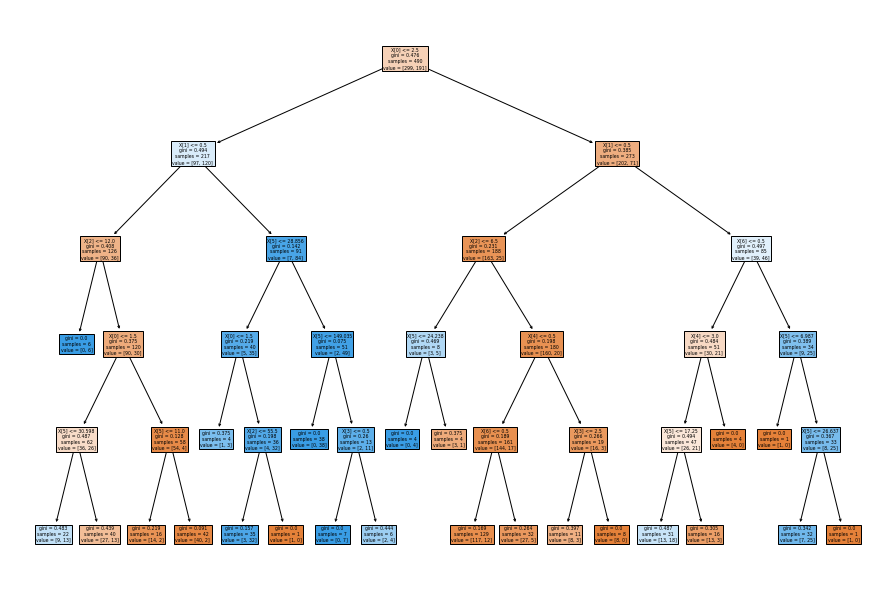

In [22]:
# plt.figure(figsize = [15.0,10.5])
# plot_tree(skDT, filled=True)
# plt.show()

# My Regressor

In [23]:
class DTRegressor:
    
    def __init__(self, splitter = "best", max_depth = 2, min_samples_split = 5, max_features_split = None):
        
        self.splitter = splitter
        
        self.max_features_split = max_features_split
        
        self.max_depth = max_depth
        
        self.min_samples_split = min_samples_split
        
        self.Root = None
        
        
    def _add_default_labels(self, branch_uni, branch_dist):
        
        
        
        classification_type_label_mapper = { "binary_0": ([0,1] , [0,0]) ,
                                            
                                            "multi_class_0" : ([i for i in range(self.min_unique_label,
                                                                                 self.num_unique_labels )],
                                                               [0 for _ in range(self.num_unique_labels) ]) 
                                            }
        
        
        if self.num_unique_labels == 2:
             classification_type = "binary"
        
        elif self.num_unique_labels > 2:
            classification_type = "multi_class"
        
        
        
        if len(branch_uni) == 0:
            return classification_type_label_mapper[classification_type + "_" + str(0)]
        
        
        elif len(branch_uni) < self.num_unique_labels:
            
            
            num_uni = [ ]; num_dist = [ ]
            
            # ( list( (branch_uni[0], 1 - branch_uni[0]) ), list((branch_dist[0],0 ) ) )
            dist_counts = dict(zip(branch_uni, branch_dist))
            for i in range(self.min_unique_label, self.num_unique_labels):
                
                if i in branch_uni:
                    num_uni.append(i)
                    num_dist.append(  dist_counts[i] )
                
                else:
                    num_uni.append(i)
                    num_dist.append(0)
                    
            
            return (num_uni, num_dist)
            
        
        else:
            return (branch_uni, branch_dist)
        
        
    def _identify_split(self, X, y, Root = True):
        
        if self.splitter == "random":

            features_index = np.random.choice(a = X.shape[1],
                                                    size = self.max_features_split,
                                                    replace = False)
            features_index.sort()

        if self.splitter == "best":
            features_index = range(X.shape[1])

            
        
        # Concatenating whole data set column wise
        whole_data = np.concatenate((X, y.reshape(-1, 1)), axis  = 1)
        
        Features_Impurities = {}
        
        
        # Now go through each feature amongst all features
        for feature_index in features_index:
            
            
            all_rows_feature = np.expand_dims( X[: , feature_index], axis = 1 )
            
            # identify if all (m) of feature values are categorical or continuous variable
            
            # If it's a continuous variable, take average of adjacent pairs of feature values
            # for each value of this feature, do a binary evaluation, i.e., greater than this value and less than this
            # value compare the corresponding label values
            
            # after comparing (m) label values against binary evaluation of this feature values, calculate impurity of:
                # left branch and right branch of this feature value ( the binary comparisions)
                # Finally, calculate impurity w.r.t this feature on the whole
                
            # if categorical, go through each category value of this feature, do a binary evaluation, i.e., < / > this value
            # compare the corresponding label values
            
            
            
            
            if all_rows_feature.dtype == "float32" or all_rows_feature.dtype == "float64":
                
                # Sort values in increasing order
                all_rows_feature.sort()
                
                # Calculate avergae of adjacent values and increase the data count size
                new_data_feature = []
                
                new_data_feature = [ (all_rows_feature[i-1] + all_rows_feature[i]) / 2  for i in range(1, len(all_rows_feature)) ]
                        
                

                value_impurities_list = []
               
            
                #for each value of these newly calculated features ...
                for cv in new_data_feature:
                    
                    # do a binary evaluation, i.e., greater than this value and less than this value
                    # self.feature_names, df.iloc[:, feature_index]
                    
                    left_branch_whole = whole_data[ np.where( whole_data[:, feature_index] <= cv ),
                                                : ].reshape(-1,whole_data.shape[1])
                                        
                    
                    
                    right_branch_whole = whole_data[ np.where( whole_data[:, feature_index] > cv ),
                                                 : ].reshape(-1, whole_data.shape[1])
                    
                   
                    
                    
                    # Calculate the impurities w.r.t to each of the branches
                    # left_impurity: 0.99, right_impurity: 0.3115
                    left_impurity = Impurity(dist = left_branch_whole[:, -1], typ = "MSE").mse
                    right_impurity = Impurity( dist = right_branch_whole[:, -1], typ = "MSE").mse
                    
                    
                    # left_total: 10, right_total: 33
                    left_total_dist = left_branch_whole.shape[0] 
                    right_total_dist = right_branch_whole.shape[0]
                    
                    
                    
                    # total_target: 43
                    total_target_dist = left_total_dist+ right_total_dist
                    
                    # cv_impurity: (10/43) * 0.99 + (33/43) * 0.31 => 23.25
                    current_value_impurity = ( left_total_dist / total_target_dist ) * left_impurity \
                    + ( right_total_dist / total_target_dist) * right_impurity
                    
                                        
                    
                    value_impurities_list.append((cv, current_value_impurity, left_branch_whole, right_branch_whole))
                    
                
                    
                value_impurities_df = pd.DataFrame(data = value_impurities_list,
                                                  columns = ["cvs", 'Impurity', "left_branch_df", "right_branch_df"])
                
                value_impurities_list = [ ]
                
                
                
                # Calculate minimum impurity of all individual features
                min_impurity_val = min(value_impurities_df["Impurity"])    
                
                
                # For this feature 'X' , the value which yields minimum impurity
                Features_Impurities["X[{}]".format(feature_index) ] = value_impurities_df.loc\
                [value_impurities_df["Impurity"] == min_impurity_val, 
                 ["cvs", 'Impurity', "left_branch_df", "right_branch_df"]].values
                
                
                
                
                
                
                # Choosing only one row of all minimum impurities, if there are multiple rows satisfying the condition
                if len(Features_Impurities["X[{}]".format(feature_index) ] ) > 1:
                    Features_Impurities["X[{}]".format(feature_index) ] = \
                    Features_Impurities["X[{}]".format(feature_index) ][ np.random.randint(low = 0,
                                                high = len(Features_Impurities["X[{}]".format(feature_index) ]),
                                        size = (1,)) ]
                    
                    
                
                
                
   
            
            elif all_rows_feature.dtype == "int32" or all_rows_feature.dtype == "int64":
                pass
        
    
        user_ids = []
        frames = []

        for user_id, d in Features_Impurities.items():
            user_ids.append(user_id)
            frames.append(pd.DataFrame(d, columns =["cv", "Impurity", "lbdf", "rbdf"]))

        Features_Imp_df = pd.concat(frames, keys=user_ids)
        
        
        # Calculating min impurity at feature level
        min_cv = min(Features_Imp_df["Impurity"].values)

        result = Features_Imp_df.loc[Features_Imp_df["Impurity"] == min_cv , ["cv", "Impurity", "lbdf", "rbdf"]]
        
        
        result = result.sample(n=1, replace = False)
         
        result_index = result.index[0][0]
        
        finalresult = result.values[0]
        
        
        return (result_index, finalresult[0],
                finalresult[1],
                finalresult[2], finalresult[3]  )
    
    
    def fit(self, X,y):
        
        """
        a. Because it's a classifier we already know what the output variable is, it's a fixed label.
        ( for now assuming it's already binary encoded).
        
        b. now go through each feature, identify if that feature is a fixed integer number or a continuous variable.
        
        """
        
        
        self.X = X
        self.y = y
        
        
        # Identify if it's a binary-class classification or multi-class classification
             # TBD 4/25/20
            
        
        
        feature,feature_threshold,impurity\
        ,left_branch, right_branch = self._identify_split(X = self.X, y = self.y, Root = True)
            
        
        
        self.Root = Node(feature = feature, feature_threshold = feature_threshold,
                        impurity = impurity,
                        lbd = left_branch, rbd = right_branch, depth = 0,
                        samples = len(X),
                        values = np.mean(self.y),
                        
                        label_class = 'Default')
        
        
        
        
        # We have found a perfectly seperable data set, which seperates two classes with no impurities
        # splitting this data any futher will not lead to better impurities, as there's no such thing as
        # negative impurities
        if self.Root.impurity == 0:
            
            self.Root.left_branch = Node(feature = None, feature_threshold = None, impurity = 0,
                 lbd = None, rbd = None, 
                 
                 samples = np.sum(self.Root.left_branch_dist.values),
                
                 label_class = self.Root.left_branch_dist, leaf = True, depth = 1 )
            
            
            self.Root.right_branch = Node(feature = None, feature_threshold = None, impurity = 0,
                 lbd = None, rbd = None,
                 
                 samples = np.sum(self.Root.right_branch_dist.values),
                 
                 label_class = self.Root.right_branch_dist, leaf = True, depth = 1 )
            
            
            return "Fitted the data set"
        
        
        
        
        # The root node does not have perfect impurity, so we will have to build the tree further to classify properly
        else:
            
            actualRoot = self.Root;  stack = []; stack.append(actualRoot)
            
            
            # Iterate until stack is empty of all nodes, and until you found all left and right branches
            # to current root node
            while len(stack) > 0:
                
                # Popping the top of stack and calling it root node
                currentRoot = stack.pop()
                
            
                # Checking if we reached maximum depth
                if currentRoot.depth == self.max_depth:
                    currentRoot.feature = None; currentRoot.feature_threshold = None
                    currentRoot.leaf = True; currentRoot.left_branch_dist = None
                    currentRoot.right_branch_dist = None; 
                    currentRoot.left_branch = None; currentRoot.right_branch = None
                    continue
        
                if (currentRoot.left_branch == None) & (not currentRoot.leaf):
                    
#                     and \ currentRoot.left_branch_dist.shape[1] >= 2
                    if currentRoot.left_branch_dist.shape[0] >= self.min_samples_split:
                                               
                    
                    

                        # Calculate the impurity if we not had to split the current data with extra features
                        pure_left_imp = Impurity(dist = currentRoot.left_branch_dist[:, -1],
                                                typ = "MSE" ).mse

                        
                        calc_feature,calc_feature_threshold,calc_left_impurity\
                        ,calc_left_branch_dist, calc_right_branch_dist = self._identify_split\
                        (X = currentRoot.left_branch_dist[: , :-1],
                         y = currentRoot.left_branch_dist[:, -1])

                        # the impurity is lesser when we are at current level
                        if pure_left_imp <= calc_left_impurity:

                            currentRoot.left_branch = Node(feature = None, feature_threshold=None,

                                                           impurity = pure_left_imp, lbd= None, rbd=None, 

                                                           values = np.mean(currentRoot.left_branch_dist[:, -1]),

                                                           samples = currentRoot.left_branch_dist.shape[0],

                                                           label_class = "Calculate ! You !", leaf = True,

                                                          depth = currentRoot.depth + 1)


                            stack.append(currentRoot)


                        # the impurity would be lesser if we split the current data 
                        # by going down to one more level
                        elif pure_left_imp > calc_left_impurity:


                            currentRoot.left_branch = Node(feature = calc_feature,
                                                           feature_threshold = calc_feature_threshold,
                                                        impurity = calc_left_impurity,
                                                        lbd = calc_left_branch_dist,
                                                        rbd = calc_right_branch_dist,
                                                        values = np.mean(currentRoot.left_branch_dist[:, -1]),
                                samples = currentRoot.left_branch_dist.shape[0] ,                     
                                label_class = "Calculate", leaf = False,
                                depth = currentRoot.depth + 1)


                            stack.append(currentRoot)
                            stack.append(currentRoot.left_branch)
                    

                    
                    # else 
                    else:
                        
                        
                        currentRoot.left_branch = Node(feature = None, feature_threshold= None,
                                                      lbd = None, rbd = None,
                                                    samples = currentRoot.left_branch_dist.shape[0],
                                                    values = np.mean(currentRoot.left_branch_dist[:,-1]),
                                                    label_class = "Default",
                                                    leaf = True)
                        
                        
                        
                        
                        stack.append(currentRoot)

                elif (currentRoot.right_branch == None) & (not currentRoot.leaf):
                    
                   
                    if currentRoot.right_branch_dist.shape[0] >= self.min_samples_split: 
                        

                        # Calculate the impurity if we not had to split the current data with extra features
                        pure_right_imp = Impurity(dist = currentRoot.right_branch_dist[:, -1],
                                                typ = "MSE" ).mse


                        calc_feature,calc_feature_threshold,calc_right_impurity\
                        ,calc_left_branch_dist, calc_right_branch_dist = self._identify_split\
                        (X = currentRoot.right_branch_dist[:, :-1],
                         y = currentRoot.right_branch_dist[:, -1],  Root = True)
                        
                        

                        # the impurity is lesser when we are at current level
                        if pure_right_imp <= calc_right_impurity:


                            currentRoot.right_branch = Node(feature = None, feature_threshold=None,

                                                           impurity = pure_right_imp, lbd= None, rbd=None, 

                                                           values = np.mean(currentRoot.right_branch_dist[:, -1]),

                                                           samples = currentRoot.right_branch_dist.shape[0],

                                                           label_class = "Calculate ! You !", leaf = True,

                                                           depth = currentRoot.depth + 1)


                            


                        # the impurity would be lesser if we split the current data 
                        # by going down to one more level
                        elif pure_right_imp > calc_right_impurity:

                            
                            
                            
                            currentRoot.right_branch = Node(feature = calc_feature,
                                feature_threshold = calc_feature_threshold,
                                impurity = calc_right_impurity, 
                                lbd = calc_left_branch_dist,
                                rbd = calc_right_branch_dist,
                                values = np.mean(currentRoot.right_branch_dist[:, -1]),
                                samples = currentRoot.right_branch_dist.shape[0],                            
                                label_class = "Calculate", leaf = False,
                                depth = currentRoot.depth + 1)


                            stack.append(currentRoot)
                            stack.append(currentRoot.right_branch)

                    
                    # else
                    else:
                        
                        
                        
                        currentRoot.right_branch = Node(feature = None, feature_threshold= None,
                                                      lbd = None, rbd = None,
                                                    samples = currentRoot.right_branch_dist.shape[0],
                                                    values = np.mean(currentRoot.right_branch_dist[:, -1]),
                                                    label_class = "Default",
                                                    leaf = True)
                                  
              
                else:
                    pass
            
            
            
            self.training_metrics()
            
            return "Fitted the data set"
    
    
    def predict(self, X_pred):
        
        actualRoot = self.Root
        predicted_labels = []


        for row in X_pred:
            
            row = row.reshape(-1, self.X.shape[1])
            
            while True:

                if self.Root.leaf == False and row[:, int(''.join(filter(str.isdigit, self.Root.feature)))  ] \
                                                          <= self.Root.feature_threshold :
                    
                    if self.Root.left_branch != None:
                        self.Root = self.Root.left_branch
                        

        
                elif self.Root.leaf == False and row[:, int(''.join(filter(str.isdigit, self.Root.feature)))  ] \
                                                          > self.Root.feature_threshold:
                    
                    if self.Root.right_branch != None:
                        self.Root = self.Root.right_branch
                        
                  

                elif self.Root and self.Root.leaf == True:
                    
                        
                 
                    predicted_labels.append( self.Root.values )
                    
                    break
                    
            
            self.Root = actualRoot

        
        return predicted_labels
    
    
    def training_metrics(self):
        
        predictions = self.predict(X_pred = self.X )
        targets = self.y
        
        print("Training R2_Score: {} \n".format(r2_score(y_true = targets,
               y_pred = predictions ) ) )
        
        
        print( "Training Mean Squared Error: {} \n".format( mean_squared_error( y_true = targets, 
                      y_pred =  predictions ) ) )
    
   
    def printTree(self):
        
        CR = self.Root
        
        
        stack = []; 
        
        
        while True:
            
#             (actualRoot.left_branch.feature, actualRoot.left_branch.feature_threshold, actualRoot.left_branch.samples), '\t',

#                  (actualRoot.right_branch.feature, actualRoot.right_branch.feature_threshold, actualRoot.right_branch.samples), '\n')
            
            if CR != None:
                print('\n', (CR.feature, CR.feature_threshold, CR.samples) , "\n")
                
                stack.append(CR)
                
                CR = CR.left_branch
                continue
                
                
            
            elif(stack):
                CR = stack.pop()
                print('\n', (CR.feature, CR.feature_threshold, CR.samples) , "\n")
                
                CR = CR.right_branch
                continue
                
            
            else:
                break

In [24]:
# dataset_reg = Get_Dataset(task_type = "Regression", dataset = "California_housing", prediction_type = "regressor")


# X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(dataset_reg.features,
#                                                     dataset_reg.targets,
#                                                     test_size = 0.45, shuffle = True, random_state = 16)



# X_train_r = X_train_r[:4500]
# y_train_r = y_train_r[:4500]


In [25]:
# DCTR_V2 = DTRegressor( splitter = chosen_splitter, max_depth= chosen_depth, min_samples_split= 150,
#                      max_features_split = 0)


# DCTR_V2.fit(X = X_train_r, y = y_train_r)

Training R2_Score: 0.6263203262883719 

Training Mean Squared Error: 0.4904090731569577 



'Fitted the data set'

## Test Predictions

In [26]:

# test_predictions = DCTR_V2.predict(X_pred=X_test_r)

# print("Test R2 score of own predictions: {} \n".format(r2_score(y_true = y_test_r, y_pred=test_predictions)))

# print("Test MSE of own predictions: {}".format(mean_squared_error(y_true=y_test_r, y_pred= test_predictions)))

Test R2 score of own predictions: 0.6116752122091236 

Test MSE of own predictions: 0.5133824700358246


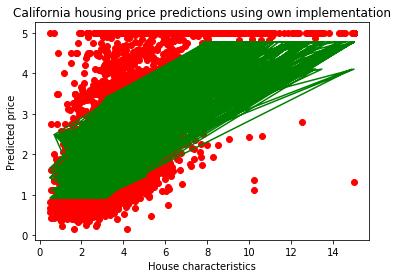

In [27]:
# plt.scatter(X_test_r[:,0], y_test_r, color = "red")
# plt.plot(X_test_r[:, 0], test_predictions, color = "green")
# plt.title("California housing price predictions using own implementation")
# plt.xlabel("House characteristics")
# plt.ylabel("Predicted price")
# plt.show()

# Sklearn Decision Tree Regressor

In [28]:


# reg_1 = DecisionTreeRegressor(criterion = "mse", splitter = chosen_splitter,
#                               max_depth = chosen_depth, min_samples_split= 150,
#                         max_features= 5 )

# reg_1.fit(X_train_r, y_train_r)


# y_1 = reg_1.predict(X_test_r)

# print("Test R2 score of scikit learn regressor: {} \n".format(r2_score(y_true = y_test_r, y_pred = y_1)) )

# print("Test MSE of scikit learn regressor: {} ".format(mean_squared_error(y_true=y_test_r, y_pred= y_1)))


Test R2 score of scikit learn regressor: 0.5685475886723803 

Test MSE of scikit learn regressor: 0.5703990875534061


## Train Predictions

In [29]:
# print("Train R2 score of scikit learn regressor: {} \n".format(r2_score( y_true = y_train_r, y_pred = reg_1.predict(X_train_r) ) ) )
      
      
# print("Train MSE of scikit learn regressor: {} \n".format(mean_squared_error(y_true=y_train_r, y_pred= reg_1.predict(X_train_r))))

Train R2 score of scikit learn regressor: 0.5931752001783661 

Train MSE of scikit learn regressor: 0.5339080154832194 



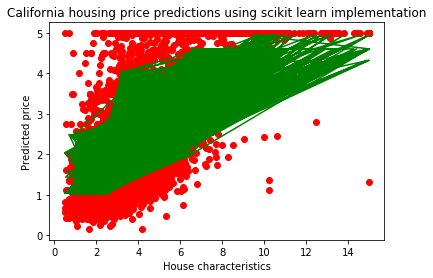

In [30]:
# plt.scatter(X_test_r[:,0], y_test_r, color = "red")
# plt.plot(X_test_r[:, 0], y_1, color = "green")
# plt.title("California housing price predictions using scikit learn implementation")
# plt.xlabel("House characteristics")
# plt.ylabel("Predicted price")
# plt.show()